# Analytical Dataset Exploration

## Date Created: 1/20/21
## Date Modified: 1/27/21 (Millie)

### Authors: Geri, Millie

This notebook serves as a place to do data exploration on the `initial_analytic_dataset.csv` which holds all the variables of interest from each of our respective datasets. This is a place to look at the relationships between variables and other assumption checks.

In [1]:
#Packages import
#import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import base64

#Note: You only need to import what you will be using in the notebook. 

### Dataset Introduction

This `initial_analytic_dataset.csv` holds all the columns of interest from the first round of data cleaning. The data includes high level information starting with population data for all county areas, then broadband connection percent, households median income, unemployment rates, and ends with information about devices in each household. These variables were chosen because factors, such as income ane unemployment, may have a relationship or impact whether or not households have access to technology or internet. 

Later in the notebook, other columns will be created with addtional datasets, such as region and division, to visualize factors in subsections of the country. 

In [2]:
file = open("initial_analytic_dataset.csv", "r")
analytic_data = pd.read_csv("initial_analytic_dataset.csv")

In [3]:
for col in analytic_data.columns:
    print(col)

id
pop_total
county
state
pop_class
state.1
year
broadband_pct
total_pop_enrolled
percent_total_pop_enrolled
margin_total_pop
est_total_households_frm_income
est_med_income_households
est_total_families
est_med_income_families
est_total_pop_16_over
est_emp_pop_ratio_16_over
est_unemp_pop_ratio_16_over
est_total_households_frm_devices
est_total_households_with_device
est_total_households_with_desktop
est_total_households_with_no
est_total_households_with_smartphone
est_total_households_with_no2
est_total_households_with_portable
est_total_households_with_no3
est_total_households_with_other
est_total_households_with_no4
est_total_households_none
est_total_households_with_sub
est_total_households_with_du
est_total_households_with_broadband
est_total_households_with_cellular
est_total_households_with_cell_no
est_total_households_with_cable
est_total_households_with_sat
est_total_households_without_sub
est_total_households_official
est_avg_household_size
est_total_families_official
est_avg_

Note from Millie: @JJ - Can you provide documentation onw hat the different "est_total_households_with_no" are? I am assuming that it mean no for a specific device, perhaps the one above, but I would like that confirmed.

In [4]:
# Reformating broadband_pct
analytic_data["broadband_pct"] = analytic_data["broadband_pct"] *100
analytic_data["broadband_pct"]

0       78.899997
1       78.099996
2       60.399997
3       66.100001
4       68.500000
          ...    
3217          NaN
3218          NaN
3219          NaN
3220          NaN
3221    79.100001
Name: broadband_pct, Length: 3222, dtype: float64

### EDA Exploration

#### Broadband Percent v. Percent Total Population Enrolled

Text(0.5, 0, 'Broadband Percentage')

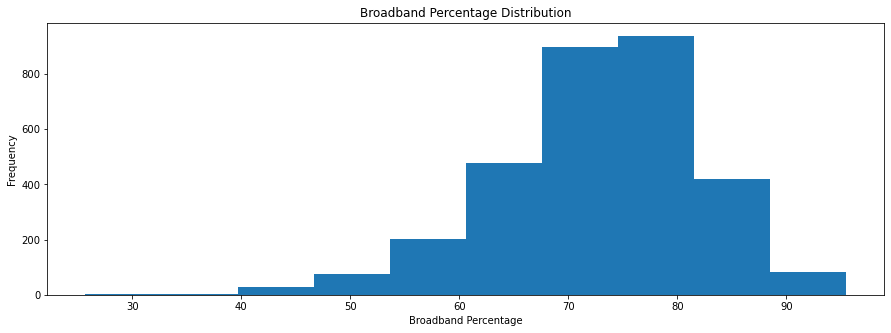

In [5]:
analytic_data["broadband_pct"].plot.hist(figsize=(15, 5))
plt.title("Broadband Percentage Distribution")
plt.xlabel("Broadband Percentage")

Text(0.5, 0, 'Total Pop Enrolled')

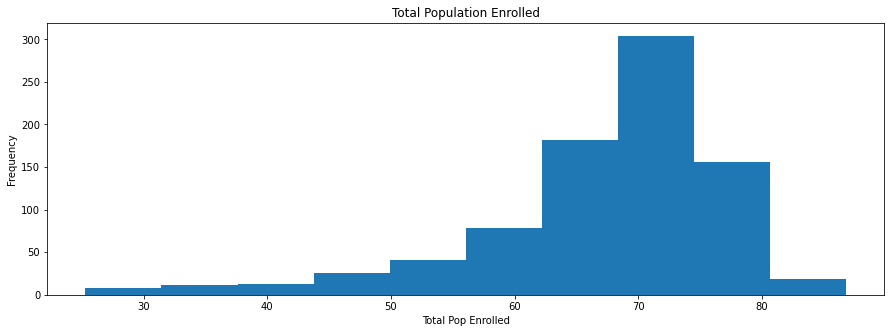

In [6]:
analytic_data["percent_total_pop_enrolled"].plot.hist(figsize=(15, 5))
plt.title("Total Population Enrolled")
plt.xlabel("Total Pop Enrolled")

Text(0, 0.5, 'Total Population Enrolled')

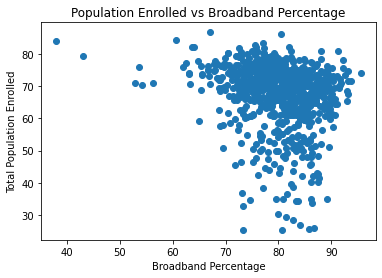

In [7]:
plt.scatter(x = analytic_data["broadband_pct"], y = analytic_data["percent_total_pop_enrolled"]) # The plot
plt.title("Population Enrolled vs Broadband Percentage") # Adding a title
plt.xlabel("Broadband Percentage") # Adding axis labels
plt.ylabel("Total Population Enrolled")

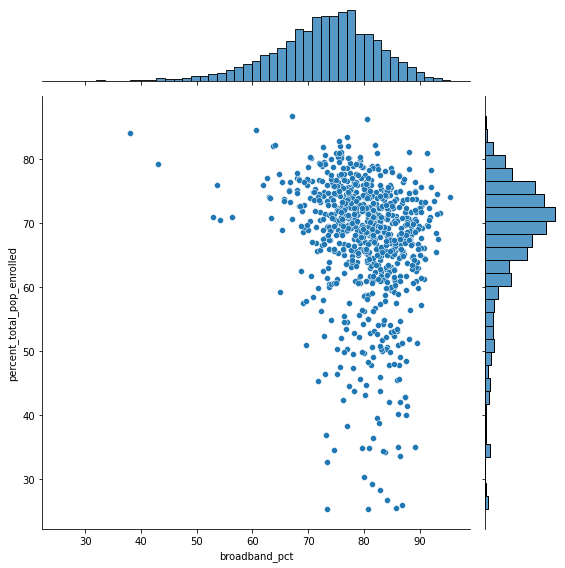

In [8]:
#Note from Millie: I added this plot because I thought it might be more useful than looking at three different plots
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "percent_total_pop_enrolled", height = 8); 

#### Distrubution of Devices in Households

For now, looking at all households with some sort of device against total households.

In [9]:
#selecting certian variables
devices_in_hh = analytic_data[['id','est_total_households_frm_devices',
'est_total_households_with_device',
'est_total_households_with_desktop',
'est_total_households_with_smartphone',
'est_total_households_with_portable',
'est_total_households_with_other',
'est_total_households_none']]

In [10]:
#choosing columns to pivot
to_pivot = devices_in_hh[[
'est_total_households_with_device',
'est_total_households_with_desktop',
'est_total_households_with_smartphone',
'est_total_households_with_portable']]

#reshaping data
plot_devices_df = pd.melt(devices_in_hh, id_vars = 'id', value_vars = to_pivot, var_name = "type", value_name = "value")

#creating a separate value column to place decimal in different place
plot_devices_df['value2'] = plot_devices_df['value']*.001

In [11]:
plot_devices_df.describe()

,value,value2
count,3.284000e+03,3284.000000
mean,2.689772e+04,26.897725
std,5.226474e+04,52.264741
min,2.178000e+03,2.178000
25%,6.914000e+03,6.914000
50%,1.214100e+04,12.141000
75%,2.669300e+04,26.693000
max,1.348569e+06,1348.569000


There is a huge std and data is heavily skewed to the right. 

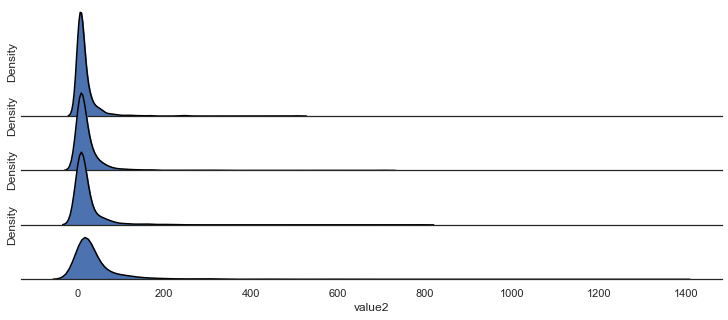

In [12]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(plot_devices_df, row="type", aspect=9, height=1.2, palette = pal)

g.map_dataframe(sns.kdeplot, x="value2", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="value2", color='black')
g.fig.subplots_adjust(hspace=-.5)


g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

#### Employment Data Distribution

In [13]:
employment_info = analytic_data[['id', 'est_total_pop_16_over', 'est_emp_pop_ratio_16_over', 
                                 'est_unemp_pop_ratio_16_over']]

plot_employ_df = pd.melt(employment_info, id_vars = 'id', value_vars = ['est_emp_pop_ratio_16_over', 
                                 'est_unemp_pop_ratio_16_over'], var_name = "type", value_name = "value")

plot_employ_df['value2'] = plot_devices_df['value']*.001

plot_employ_df.describe()


,value,value2
count,1642.000000,1642.000000
mean,31.830390,20.399951
std,27.257013,35.263328
min,1.100000,2.178000
25%,4.600000,5.733000
50%,24.800000,9.967500
75%,59.175000,21.804000
max,76.500000,701.010000


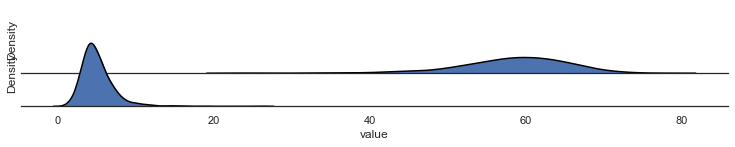

In [14]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(plot_employ_df, row="type", aspect=9, height=1.2, palette = pal)

g.map_dataframe(sns.kdeplot, x="value", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="value", color='black')
g.fig.subplots_adjust(hspace=-.5)


g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

Density plot above is incomplete. Currently troubleshooting. 

References for facet density plot:
- https://seaborn.pydata.org/examples/kde_ridgeplot.html
- https://python.plainenglish.io/ridge-plots-with-pythons-seaborn-4de5725881af

#### Unemployment and Broadband Percent

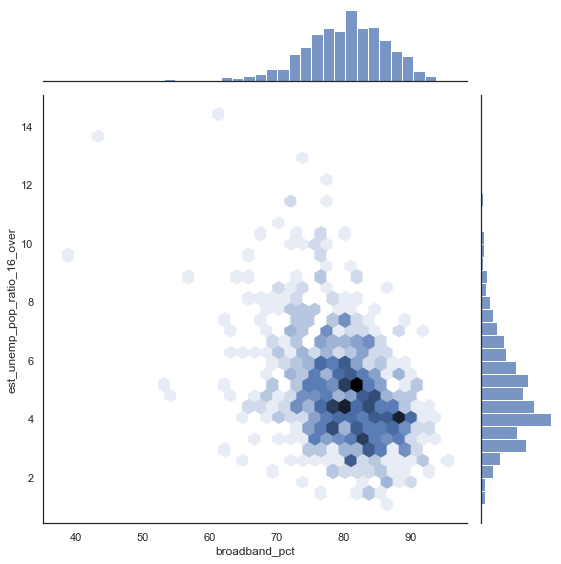

In [15]:
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
              kind = "hex", height = 8); 

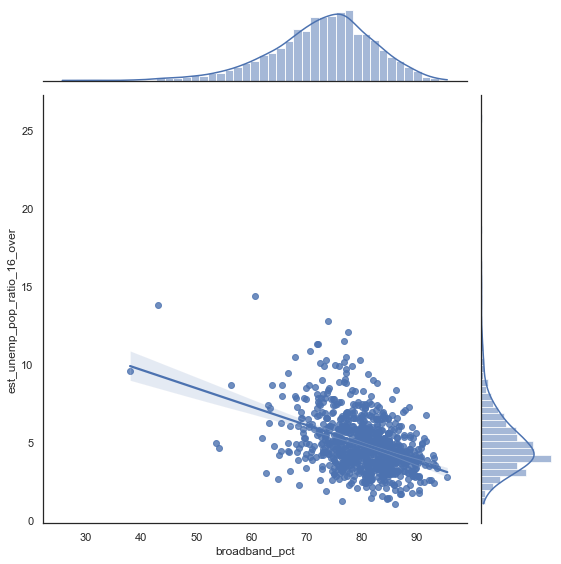

In [16]:
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
              kind = "reg", height = 8); 

### Adding Region Dimension to the Analytic Data

This is to make it easier to breakdown the data visuals so we are not looking at the entire country on one level. All visuals below are exploring with region column. 

In [17]:
regions = pd.read_csv("https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv")
regions.columns = regions.columns.str.lower().str.replace(" ", "_")
regions

,state,state_code,region,division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [18]:
revised_analytic_data = analytic_data.merge(regions, on = "state")

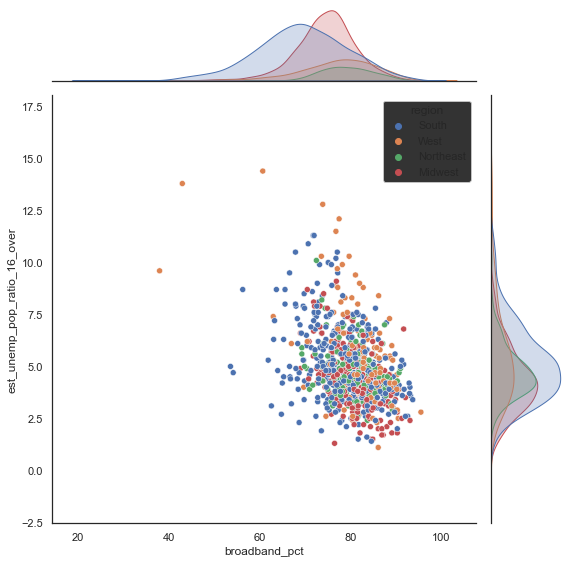

In [19]:
sns.jointplot(data = revised_analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
             hue = "region", height = 8); 

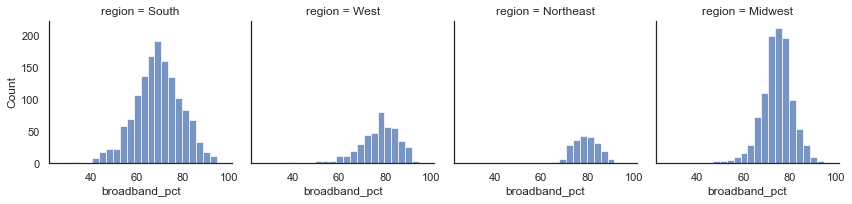

In [20]:
#broadband percent
bb_region = revised_analytic_data[['id', 'region', 'broadband_pct']]
sns.displot(
    bb_region, x="broadband_pct", col="region",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

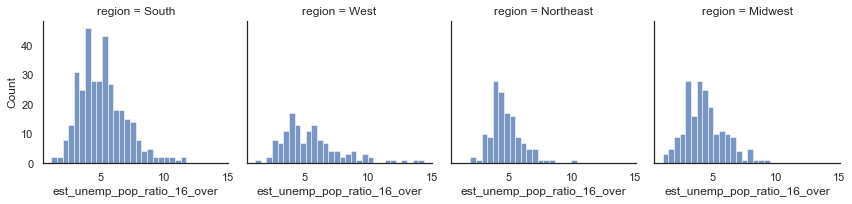

In [21]:
#umemployment ratio
sns.displot(
    revised_analytic_data, x="est_unemp_pop_ratio_16_over", col="region",
    height=3, facet_kws=dict(margin_titles=True),
)

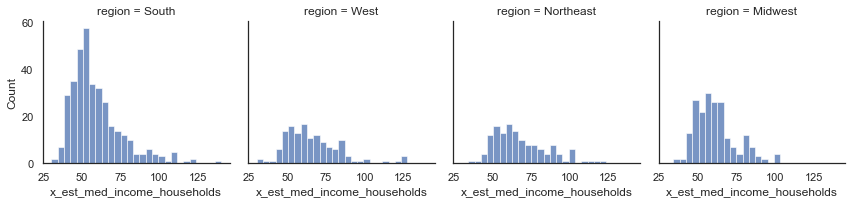

In [22]:
#creating a separate value column to place decimal in different place
revised_analytic_data['x_est_med_income_households'] = revised_analytic_data['est_med_income_households']*.001

#median income
sns.displot(
    revised_analytic_data, x="x_est_med_income_households", col="region",
    height=3, facet_kws=dict(margin_titles=True),
)


### Creating Scores

#### Income

There are various definition of poverty level or income thresholds depending on the size of the household and location. This doucmentation on poverty level for 2018 give thresholds for up to 8 persons in a household: https://aspe.hhs.gov/topics/poverty-economic-mobility/poverty-guidelines/prior-hhs-poverty-guidelines-federal-register-references/2018-poverty-guidelines

There is additional documentation households data here:https://www.census.gov/quickfacts/fact/note/US/HSD410219

With this new information, instead of choosing an arbitruary number of persons in a household and blindly applying it to all, we will need to add infomration from the households and families dataset. 

Note: Millie is creating a new notebook to view and test the data cleaning and then merging it into the initial clean dataset. 

In [31]:
income_info = analytic_data[['id','est_total_households_official', 'est_avg_household_size',
                             'est_med_income_households',
                             'est_total_families_official','est_avg_families_size',
                             'est_med_income_families']]

income_info["rnd_avg_household_size"] = income_info.loc[:,('est_avg_household_size')].round(0)
income_info["rnd_avg_families_size"] = income_info.loc[:, ('est_avg_families_size')].round(0)
#trying to get rid of the "setting with copy" warning


/var/folders/my/ly1yx2sx0f5f6gcwrghc7tsc0000gn/T/ipykernel_74043/194295501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_info["rnd_avg_household_size"] = income_info.loc[:,('est_avg_household_size')].round(0)
/var/folders/my/ly1yx2sx0f5f6gcwrghc7tsc0000gn/T/ipykernel_74043/194295501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_info["rnd_avg_families_size"] = income_info.loc[:, ('est_avg_families_size')].round(0)


,id,est_total_households_official,est_avg_household_size,est_med_income_households,est_total_families_official,est_avg_families_size,est_med_income_families,rnd_avg_household_size,rnd_avg_families_size
0,0500000US01001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0500000US01003,83501.0,2.57,56813.0,55354.0,3.18,71051.0,3.0,3.0
2,0500000US01005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US01009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3217,0500000US72147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,0500000US72149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,0500000US72151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3220,0500000US72153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
income_info["rnd_avg_household_size"].unique()

array([nan,  3.,  2.,  4.])

In [36]:
income_info["rnd_avg_families_size"].unique()

array([nan,  3.,  4.,  5.,  2.])

In [ ]:
def poverty_lvl(state, income, household_size):
    """Assign labels to county according to their population size
    """
    if state != "Alaska" or state != "Hawaii":
        if household_size == 1 and income <= 12140 or
        household_size == 2 and income <= 16460 or
        household_size == 3 and income <= 20780 or
        household_size == 4 and income <= 29420:
            label = "Poverty"
    if state == "Alaska":
        if household_size == 1 and income <= 15180 or
        household_size == 2 and income <= 20580 or
        household_size == 3 and income <= 25980 or
        household_size == 4 and income <= 31380:
            label = "Poverty"
    if state == "Hawaii":
        if household_size == 1 and income <= 13960 or
        household_size == 2 and income <= 18930 or
        household_size == 3 and income <= 23900 or
        household_size == 4 and income <= 28870:
            label = "Poverty"
    else:
        label = "Above Poverty Line"
        
    return label